# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count


In [5]:
# URL building

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
len(cities)

519

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Used for testing a single loop
# testCity = ["New York City"]
# response = requests.get(query_url + "New York City").json()
# response
# countryTemp = (response['sys']['country'])
# countryTemp

In [8]:
# making lists for the dataframe
cityName = []
cityId = []
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []
country = []


for city in cities:
    try:
        
    
      # this line is essential to the code but I got dinged for my api key running to many queries  
        response = requests.get(query_url + city).json()
      # Uncomment for submission
    
    
        # Using a temp variable so I am not appending full data for each city
        # If all the data exist THEN allow the lists to be appended
        cityNameTemp = city
        latTemp = (response['coord']['lat'])
        lonTemp = (response['coord']['lon'])
        tempTemp = (response['main']['temp'])
        humidTemp = (response['main']['humidity'])
        cloudTemp = (response['clouds']['all'])
        windTemp = (response['wind']['speed'])
        countryTemp = (response['sys']['country'])
        # Print out City and ID
        print(city)
        print(response['weather'][0]['id'])
        
        
        cityName.append(cityNameTemp)
        lat.append(latTemp)
        lon.append(lonTemp)
        temp.append(tempTemp)
        humid.append(humidTemp)
        cloud.append(cloudTemp)
        wind.append(windTemp)
        country.append(countryTemp)
    except KeyError:
        count = 1
        
data={"City":cityName,
    "Latitude":lat,
    "Longitude":lon,
    "Temperature":temp,
    "Humidity":humid,
    "Cloudiness":cloud,
    "Wind Speed":wind,
    "Country":country
     }
    
weatherCities = pd.DataFrame(data)

weatherCities.head()

hobart
801
tuktoyaktuk
600
la ronge
803
mataura
500
cidreira
801
sitka
802
east london
800
pakxan
500
mar del plata
802
albany
600
jamestown
601
cape town
804
flin flon
804
yellowknife
803
port shepstone
800
ushuaia
802
aksarka
804
cockburn town
800
muravlenko
804
alta floresta
501
hilo
801
banda aceh
804
kapaa
800
uige
500
baykit
600
coahuayana
801
kaitangata
501
sao miguel do araguaia
801
avarua
802
bredasdorp
804
bengkulu
500
bathsheba
802
hegang
802
taltal
801
bluff
500
aykhal
802
codrington
500
te anau
500
lebu
500
vaini
801
arman
600
owando
804
phan thiet
804
port alfred
801
punta arenas
803
busselton
804
constitucion
803
sorland
500
boyolangu
803
riyadh
761
diffa
800
chumikan
600
kautokeino
802
goderich
600
puerto del rosario
802
huntsville
800
lufilufi
803
novikovo
802
rikitea
800
hambantota
500
port macquarie
804
tasiilaq
501
tiksi
804
tuatapere
500
new norfolk
803
ilek
800
iqaluit
600
vuktyl
802
chuy
801
standerton
800
nikolskoye
804
hailey
800
cabo san lucas
801
flinders
800

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,hobart,-42.88,147.33,11.36,46,20,7.70,AU
1,tuktoyaktuk,69.45,-133.04,-9.00,85,90,5.10,CA
2,la ronge,55.10,-105.28,6.00,60,75,3.60,CA
3,mataura,-46.19,168.86,13.89,82,95,4.02,NZ
4,cidreira,-30.18,-50.21,18.59,84,12,2.84,BR


### Convert Raw Data to DataFrame
* Export the city data into a .csv.y
* Display the DataFrame

In [9]:
# cityName = ['hermanus', 'arraial do cabo', 'busselton', 'yellowknife', 'korfovskiy', 'rikitea', 'noumea', 'ormara', 'ushuaia', 'quelimane', 'avarua', 'souillac', 'afsin', 'mataura', 'teya', 'hobart', 'raudeberg', 'petropavlovskaya', 'peniche', 'tallahassee', 'karabulak', 'castro', 'cape town', 'komsomolskiy', 'patea', 'barentsburg', 'gat', 'edd', 'fatikchhari', 'campbell river', 'addis abeba', 'airai', 'dikson', 'severo-kurilsk', 'carnarvon', 'tumannyy', 'kieta', 'faanui', 'taolanaro', 'georgetown', 'bluff', 'halifax', 'margate', 'saint george', 'paidha', 'punta arenas', 'shingu', 'avera', 'belushya guba', 'saskylakh', 'puerto escondido', 'hilo', 'kushmurun', 'nuuk', 'bosaso', 'sulangan', 'tianpeng', 'atuona', 'tazovskiy', 'bredasdorp', 'vaini', 'bethel', 'kenai', 'rungata', 'hambantota', 'tsihombe', 'marcona', 'channel-port aux basques', 'zeya', 'puerto ayora', 'hamilton', 'syracuse', 'mahebourg', 'meyungs', 'lompoc', 'bulata', 'illoqqortoormiut', 'port alfred', 'mount isa', 'snasa', 'clyde river', 'saint-joseph', 'barrow', 'falaleu', 'hirara', 'gberia fotombu', 'kuchinarai', 'balkhash', 'geraldton', 'opuwo', 'tasiilaq', 'ixtapa', 'pombas', 'beyneu', 'port lincoln', 'baghdad', 'yar-sale', 'moindou', 'ostrovnoy', 'new norfolk', 'thabazimbi', 'luan', 'agirish', 'saint-philippe', 'cidreira', 'longyearbyen', 'banjar', 'albany', 'hasaki', 'tabiauea', 'bengkulu', 'tiksi', 'grand river south east', 'sibolga', 'ribeira grande', 'hwange', 'armacao dos buzios', 'katsuura', 'norman wells', 'vestmannaeyjar', 'pangnirtung', 'aswan', 'lebu', 'olafsvik', 'matsusaka', 'aykhal', 'luoyang', 'butaritari', 'sao filipe', 'kapaa', 'sao raimundo nonato', 'talnakh', 'wahpeton', 'calvinia', 'tautira', 'pochutla', 'rabaul', 'esso', 'tulun', 'quatre cocos', 'east london', 'flinders', 'port elizabeth', 'one hundred mile house', 'beneditinos', 'constitucion', 'brewster', 'praia da vitoria', 'pak phanang', 'nanortalik', 'pangkalanbuun', 'yulara', 'cookshire', 'khatanga', 'nikolskoye', 'kodiak', 'chuy', 'udachnyy', 'rio gallegos', 'leshukonskoye', 'pisco', 'papara', 'iqaluit', 'palabuhanratu', 'saleaula', 'esperance', 'coihaique', 'dukat', 'libenge', 'vostok', 'khorixas', 'salinas', 'grand gaube', 'kaitangata', 'duz', 'nome', 'kajaani', 'merrill', 'guajara-mirim', 'narsaq', 'tuatapere', 'najran', 'chokurdakh', 'mehamn', 'ouro preto do oeste', 'shalinskoye', 'singarayakonda', 'lorengau', 'jamestown', 'samalaeulu', 'bohdan', 'nemuro', 'vaitupu', 'nizhniy tsasuchey', 'tilichiki', 'ibipeba', 'leeton', 'lazaro cardenas', 'san cristobal', 'maceio', 'sentyabrskiy', 'matara', 'kegayli', 'neuquen', 'charagua', 'osoyoos', 'lipin bor', 'qaanaaq', 'kavaratti', 'bubaque', 'tabarqah', 'ilebo', 'khorramshahr', 'moree', 'baruun-urt', 'saldanha', 'capitan bado', 'semnan', 'pacific grove', 'amderma', 'olean', 'santa fe', 'bambous virieux', 'havre-saint-pierre', 'sungaipenuh', 'haines junction', 'mugango', 'karratha', 'samarai', 'ballina', 'verkhnevilyuysk', 'nizhneyansk', 'lagoa', 'turukhansk', 'san jose', 'dingle', 'shunyi', 'kysyl-syr', 'trincomalee', 'thompson', 'gravelbourg', 'malakal', 'ojinaga', 'malazgirt', 'bonavista', 'cabo san lucas', 'kutum', 'araouane', 'hoa binh', 'shaoyang', 'shimorskoye', 'corn island', 'craigieburn', 'akdepe', 'haibowan', 'nouakchott', 'cividale del friuli', 'bongandanga', 'kalabo', 'luderitz', 'attawapiskat', 'te anau', 'comodoro rivadavia', 'gimbi', 'hithadhoo', 'padang', 'provideniya', 'berlevag', 'goderich', 'kaduqli', 'sabinopolis', 'riverton', 'kilindoni', 'san patricio', 'cam pha', 'rawson', 'le mars', 'puerto princesa', 'mulanje', 'mys shmidta', 'broken hill', 'santa comba', 'lavrentiya', 'owatonna', 'asau', 'umzimvubu', 'tura', 'bocas del toro', 'sisimiut', 'ahipara', 'tavistock', 'empangeni', 'lolua', 'plaza de caisan', 'tabou', 'novaya igirma', 'san carlos del zulia', 'nyurba', 'marawi', 'nabire', 'kruisfontein', 'tuktoyaktuk', 'blagoyevo', 'valparai', 'lasa', 'merauke', 'muros', 'milkovo', 'bom jesus do itabapoana', 'southbridge', 'panaytayon', 'coquimbo', 'palmer', 'yining', 'chumikan', 'suntar', 'shache', 'demba', 'monte alegre', 'victoria', 'portland', 'upernavik', 'roswell', 'blythe', 'mnogovershinnyy', 'dubbo', 'ewo', 'lowestoft', 'san quintin', 'lodwar', 'aklavik', 'gamba', 'palasa', 'rocha', 'yerofey pavlovich', 'fortuna', 'china', 'hihifo', 'port hardy', 'creel', 'half moon bay', 'pevek', 'labuhan', 'leeuwarden', 'iranshahr', 'payson', 'barabai', 'ekhabi', 'tevriz', 'warrnambool', 'funadhoo', 'camopi', 'lujiang', 'kirksville', 'ancud', 'kampot', 'lashio', 'ngemplak', 'naze', 'miyazu', 'russkaya polyana', 'warqla', 'cherskiy', 'kloulklubed', 'kayes', 'sinnamary', 'vanimo', 'torbay', 'leningradskiy', 'lubao', 'lata', 'bossembele', 'mata', 'chitradurga', 'tubuala', 'waitati', 'kichera', 'ilulissat', 'beringovskiy', 'sioux lookout', 'mende', 'abancay', 'am timan', 'itarema', 'tiarei', 'labuan', 'khonuu', 'mala bilozerka', 'isiro', 'oussouye', 'vanavara', 'nassau', 'kpandu', 'mar del plata', 'meulaboh', 'novoseleznevo', 'wellington', 'cotacachi', 'madison', 'walvis bay', 'axim', 'bandarbeyla', 'oistins', 'san vicente', 'matamoros', 'karlskoga', 'kupang', 'northam', 'tomatlan', 'ajdabiya', 'nepa nagar', 'balikpapan', 'namie', 'geresk', 'santa rosa', 'kavieng', 'ahuatempan', 'georgiyevka', 'karamea', 'boddam', 'talcahuano', 'velasco ibarra', 'ponta do sol', 'oxford', 'zaysan', 'east angus', 'puerto del rosario', 'chapais', 'alta floresta', 'razole', 'amuntai', 'dongkan', 'sao gabriel da cachoeira', 'kalagarh', 'port augusta', 'dawlatabad', 'solnechnyy', 'birao', 'mitzic', 'alyangula', 'sibu', 'collie', 'cadillac', 'oktyabrskiy', 'cayenne', 'waiuku', 'dubenskiy', 'durres', 'sur', 'poum', 'bhatkal', 'kon tum', 'kazalinsk', 'sussex', 'krasnoselkup', 'zyryanka', 'arman', 'san ignacio', 'port blair', 'oswego', 'tual', 'fort nelson', 'louisbourg', 'davila', 'disna', 'dodge city', 'hami', 'puntarenas', 'hukay', 'salalah', 'bathsheba', 'zhanakorgan', 'bridlington', 'eskasem', 'kachiry', 'rock sound', 'touros', 'rybinsk', 'tierralta', 'moroni', 'kuito', 'port hawkesbury', 'marion', 'wakkanai', 'asyut', 'sebezh', 'bima', 'manoharpur', 'jumla', 'cuicatlan', 'dalmau', 'tambul', 'madang', 'pinsk', 'la ciotat', 'sturgeon bay', 'saint-pierre', 'teknaf', 'atotonilco el grande', 'hope mills', 'abu jubayhah', 'jaru', 'vardo', 'chiredzi', 'bazarnyye mataki', 'ambilobe', 'mana', 'upata', 'krasnogvardeyets', 'bali', 'kalevala', 'gejiu', 'toyooka', 'hay river', 'ongwediva', 'manta', 'mweka', 'luchegorsk', 'eureka', 'bac giang', 'dupnica', 'tigil', 'rio grande', 'wucheng', 'imeni poliny osipenko', 'taoudenni', 'hobyo', 'fort saint james', 'caldwell', 'abalak', 'tuy hoa', 'alice springs', 'sitka', 'nelson bay', 'nalgonda', 'voh', 'lima', 'atar', 'vila', 'eenhana', 'tambacounda', 'krutinka', 'howard springs', 'harper', 'zapolyarnyy', 'fuyang', 'erdemli', 'manokwari', 'huicungo', 'inhambane', 'yangjiang', 'mission bend', 'ramasukha', 'samusu', 'ola', 'manzhouli', 'daru', 'palu', 'gambela', 'kahului', 'barcelos', 'grand forks', 'santiago', 'zolotinka', 'hualmay', 'badarganj', 'promysla', 'tibati', 'knyaze-volkonskoye', 'mirandopolis', 'iracoubo', 'kamenskoye', 'puerto ayacucho', 'wanxian', 'bulacan', 'beaumont', 'sao joao da barra', 'dzhusaly', 'ascension', 'jalu', 'qasigiannguit', 'doctor arroyo', 'saint anthony', 'marsh harbour', 'soloneshnoye', 'toropets', 'nadym', 'shimoda', 'ahuimanu', 'la seyne-sur-mer', 'nenagh', 'las choapas', 'hunza', 'nguiu', 'kerouane', 'zabid', 'chiang rai', 'mahibadhoo', 'pindwara', 'christchurch', 'shetpe', 'kyaukse', 'bitlis', 'mugur-aksy', 'roald']



In [10]:
weatherCities.to_csv('cities.csv')


In [11]:
weatherCities.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,hobart,-42.88,147.33,11.36,46,20,7.70,AU
1,tuktoyaktuk,69.45,-133.04,-9.00,85,90,5.10,CA
2,la ronge,55.10,-105.28,6.00,60,75,3.60,CA
3,mataura,-46.19,168.86,13.89,82,95,4.02,NZ
4,cidreira,-30.18,-50.21,18.59,84,12,2.84,BR


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
print(len(weatherCities))
TooHumid = weatherCities[weatherCities.Humidity>100]                         
notTooHumid = weatherCities[weatherCities.Humidity<=100]                         
len(notTooHumid)

470


470

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Though I get what you're trying to make me do I burned a bunch of time trying to get it done when I can do it
# on one line.  If I have the time I'll come back and fix it up
notTooHumid = weatherCities[weatherCities.Humidity<=100]

In [14]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
notTooHumid.to_csv('cities.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

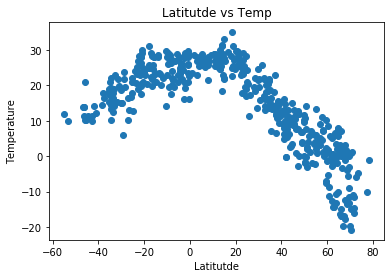

In [15]:
plt.scatter(notTooHumid.Latitude, notTooHumid.Temperature)

plt.title("Latitutde vs Temp")
plt.ylabel("Temperature")
plt.xlabel("Latitutde")
plt.show()

## Latitude vs. Humidity Plot

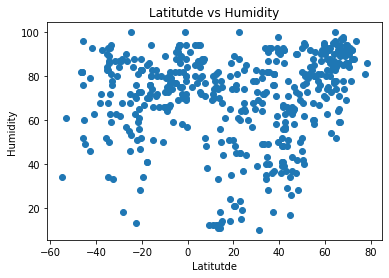

In [16]:
plt.scatter(notTooHumid.Latitude, notTooHumid.Humidity)

plt.title("Latitutde vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitutde")
plt.show()

## Latitude vs. Cloudiness Plot

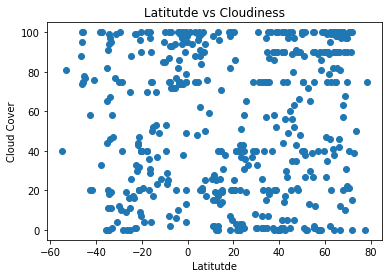

In [17]:
plt.scatter(notTooHumid.Latitude, notTooHumid.Cloudiness)

plt.title("Latitutde vs Cloudiness")
plt.ylabel("Cloud Cover")
plt.xlabel("Latitutde")
plt.show()

## Latitude vs. Wind Speed Plot

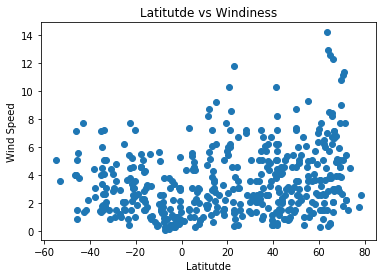

In [18]:
plt.scatter(notTooHumid.Latitude, notTooHumid["Wind Speed"])

plt.title("Latitutde vs Windiness")
plt.ylabel("Wind Speed")
plt.xlabel("Latitutde")
plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots

In [20]:
# Create Northern and Southern Hemisphere DataFrames
notTooHumidNorth = notTooHumid[notTooHumid.Latitude>=0]
notTooHumidSouth = notTooHumid[notTooHumid.Latitude<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

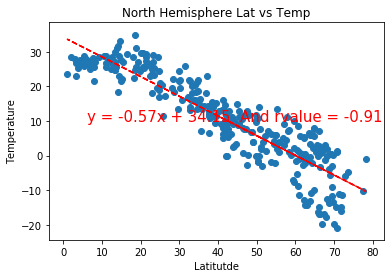

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(notTooHumidNorth.Latitude, notTooHumidNorth.Temperature)
regress_values = notTooHumidNorth.Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  And rvalue = " +  str(round(rvalue,2))

plt.plot(notTooHumidNorth.Latitude,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(notTooHumidNorth.Latitude, notTooHumidNorth.Temperature)

plt.title("North Hemisphere Lat vs Temp")
plt.ylabel("Temperature")
plt.xlabel("Latitutde")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

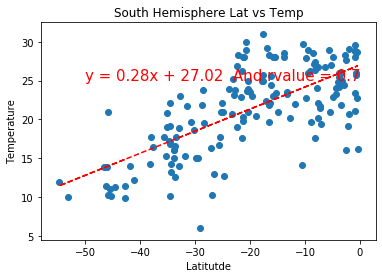

y = 0.28x + 27.02  And rvalue = 0.7


In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(notTooHumidSouth.Latitude, notTooHumidSouth.Temperature)
regress_values = notTooHumidSouth.Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  And rvalue = " +  str(round(rvalue,2))

plt.plot(notTooHumidSouth.Latitude,regress_values,"r--")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

plt.scatter(notTooHumidSouth.Latitude, notTooHumidSouth.Temperature)

plt.title("South Hemisphere Lat vs Temp")
plt.ylabel("Temperature")
plt.xlabel("Latitutde")

plt.show()

print(line_eq)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

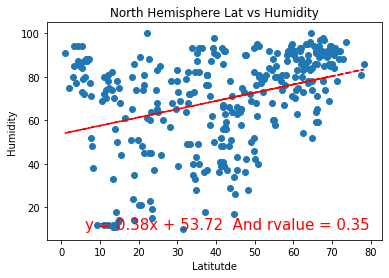

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(notTooHumidNorth.Latitude, notTooHumidNorth.Humidity)
regress_values = notTooHumidNorth.Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  And rvalue = " +  str(round(rvalue,2))

plt.plot(notTooHumidNorth.Latitude,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(notTooHumidNorth.Latitude, notTooHumidNorth.Humidity)

plt.title("North Hemisphere Lat vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitutde")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

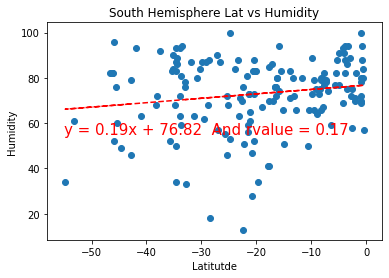

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(notTooHumidSouth.Latitude, notTooHumidSouth.Humidity)
regress_values = notTooHumidSouth.Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  And rvalue = " +  str(round(rvalue,2))

plt.plot(notTooHumidSouth.Latitude,regress_values,"r--")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")

plt.scatter(notTooHumidSouth.Latitude, notTooHumidSouth.Humidity)

plt.title("South Hemisphere Lat vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitutde")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

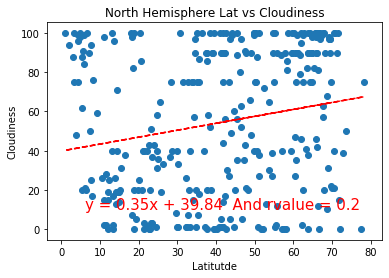

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(notTooHumidNorth.Latitude, notTooHumidNorth.Cloudiness)
regress_values = notTooHumidNorth.Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  And rvalue = " +  str(round(rvalue,2))

plt.plot(notTooHumidNorth.Latitude,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(notTooHumidNorth.Latitude, notTooHumidNorth.Cloudiness)

plt.title("North Hemisphere Lat vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitutde")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

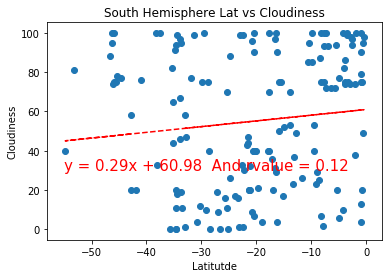

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(notTooHumidSouth.Latitude, notTooHumidSouth.Cloudiness)
regress_values = notTooHumidSouth.Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  And rvalue = " +  str(round(rvalue,2))

plt.plot(notTooHumidSouth.Latitude,regress_values,"r--")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

plt.scatter(notTooHumidSouth.Latitude, notTooHumidSouth.Cloudiness)

plt.title("South Hemisphere Lat vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitutde")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

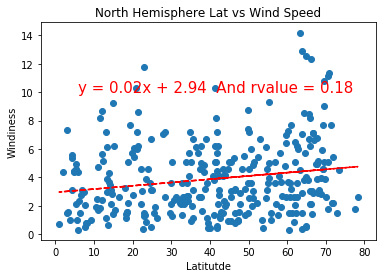

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(notTooHumidNorth.Latitude, notTooHumidNorth["Wind Speed"])
regress_values = notTooHumidNorth.Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  And rvalue = " +  str(round(rvalue,2))

plt.plot(notTooHumidNorth.Latitude,regress_values,"r--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(notTooHumidNorth.Latitude, notTooHumidNorth["Wind Speed"])

plt.title("North Hemisphere Lat vs Wind Speed")
plt.ylabel("Windiness")
plt.xlabel("Latitutde")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

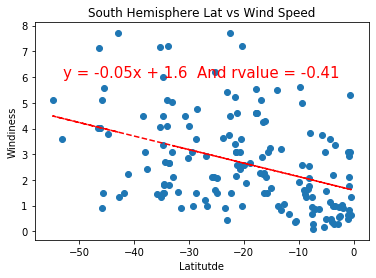

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(notTooHumidSouth.Latitude, notTooHumidSouth["Wind Speed"])
regress_values = notTooHumidSouth.Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "  And rvalue = " +  str(round(rvalue,2))

plt.plot(notTooHumidSouth.Latitude,regress_values,"r--")
plt.annotate(line_eq,(-53,6),fontsize=15,color="red")

plt.scatter(notTooHumidSouth.Latitude, notTooHumidSouth["Wind Speed"])

plt.title("South Hemisphere Lat vs Wind Speed")
plt.ylabel("Windiness")
plt.xlabel("Latitutde")
plt.show()